In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},

{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},

//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re

In [3]:
def get_city_lonlat(coords):
    city = {}
    for l in coords.split('\n'):
        if l.startswith('//') or l.strip() == '':
            continue
        name = re.findall("name:'(\w+)'", l)[0]
        lonlat = re.findall("geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]", l)[0]
        city[name] = list(map(float, lonlat))
    return city

city_lonlat = get_city_lonlat(coordination_source)

In [4]:
city_lonlat

{'兰州': [103.73, 36.03],
 '嘉峪关': [98.17, 39.47],
 '西宁': [101.74, 36.56],
 '成都': [104.06, 30.67],
 '石家庄': [114.48, 38.03],
 '拉萨': [102.73, 25.04],
 '贵阳': [106.71, 26.57],
 '武汉': [114.31, 30.52],
 '郑州': [113.65, 34.76],
 '济南': [117.0, 36.65],
 '南京': [118.78, 32.04],
 '合肥': [117.27, 31.86],
 '杭州': [120.19, 30.26],
 '南昌': [115.89, 28.68],
 '福州': [119.3, 26.08],
 '广州': [113.23, 23.16],
 '长沙': [113.0, 28.21],
 '沈阳': [123.38, 41.8],
 '长春': [125.35, 43.88],
 '哈尔滨': [126.63, 45.75],
 '太原': [112.53, 37.87],
 '西安': [108.95, 34.27],
 '北京': [116.46, 39.92],
 '上海': [121.48, 31.22],
 '重庆': [106.54, 29.59],
 '天津': [117.2, 39.13],
 '呼和浩特': [111.65, 40.82],
 '南宁': [108.33, 22.84],
 '银川': [106.27, 38.47],
 '乌鲁木齐': [87.68, 43.77],
 '香港': [114.17, 22.28],
 '澳门': [113.54, 22.19]}

In [5]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [6]:
def calculate_city_distance(city_name1, city_name2):
    return geo_distance(city_lonlat[city_name1], city_lonlat[city_name2])

In [7]:
calculate_city_distance('西安', '银川')

329.61826831061916

In [8]:
import networkx as nw
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [9]:
city_lonlat

{'兰州': [103.73, 36.03],
 '嘉峪关': [98.17, 39.47],
 '西宁': [101.74, 36.56],
 '成都': [104.06, 30.67],
 '石家庄': [114.48, 38.03],
 '拉萨': [102.73, 25.04],
 '贵阳': [106.71, 26.57],
 '武汉': [114.31, 30.52],
 '郑州': [113.65, 34.76],
 '济南': [117.0, 36.65],
 '南京': [118.78, 32.04],
 '合肥': [117.27, 31.86],
 '杭州': [120.19, 30.26],
 '南昌': [115.89, 28.68],
 '福州': [119.3, 26.08],
 '广州': [113.23, 23.16],
 '长沙': [113.0, 28.21],
 '沈阳': [123.38, 41.8],
 '长春': [125.35, 43.88],
 '哈尔滨': [126.63, 45.75],
 '太原': [112.53, 37.87],
 '西安': [108.95, 34.27],
 '北京': [116.46, 39.92],
 '上海': [121.48, 31.22],
 '重庆': [106.54, 29.59],
 '天津': [117.2, 39.13],
 '呼和浩特': [111.65, 40.82],
 '南宁': [108.33, 22.84],
 '银川': [106.27, 38.47],
 '乌鲁木齐': [87.68, 43.77],
 '香港': [114.17, 22.28],
 '澳门': [113.54, 22.19]}

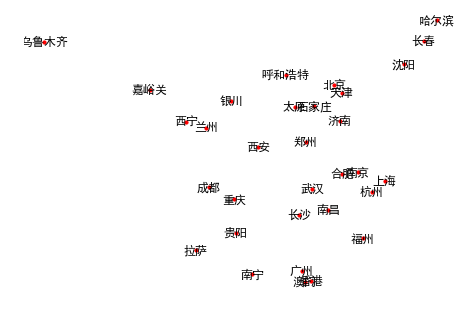

In [10]:
city_graph = nw.Graph()
city_graph.add_nodes_from(list(city_lonlat.keys()))
nw.draw(city_graph, city_lonlat, with_labels=True, node_size=10)

In [11]:
connect_distance = 700

In [12]:
from collections import defaultdict

In [13]:
def get_connection(city):
    city_connection = defaultdict(list)
    keys = city.keys()
    for k in keys:
        for t in keys:
            if k == t:
                continue
            if calculate_city_distance(t, k) < connect_distance:
                city_connection[t].append(k)
    return city_connection

city_connection = get_connection(city_lonlat)

In [14]:
city_connection

defaultdict(list,
            {'嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '西安': ['兰州',
              '成都',
              '石家庄',
              '贵阳',
              '武汉',
              '郑州',
              '广州',
              '长沙',
              '太原',
              '重庆',
              '呼和浩特',
              '南宁',
              '银川'],
             '重庆': ['兰州', '西宁', '成都', '拉萨', '贵阳', '西安', '呼和浩特', '南宁', '银川'],
             '南宁': ['兰州',
              '成都',
              '拉萨',
              '贵阳',
              '广州',
              '长沙',
              '西安',
              '重庆',
              '银川',
              '香港',
              '澳门'],
             '银川': ['兰州',
              '西宁',
              '成都',
              '拉萨

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


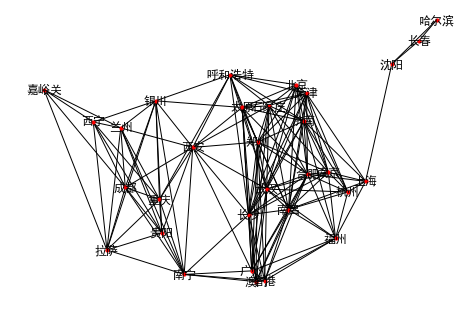

In [15]:
city_con_graph = nw.Graph(city_connection)
nw.draw(city_con_graph, city_lonlat, with_labels=True, node_size=10)

In [16]:
def bfs(graph, start, end):
    paths = [[start]]
    visited = set(start)
    while paths:
        path = paths.pop(0)
        successor = graph[path[-1]]
        for s in successor:
            if s in visited:
                continue
            new_path = path + [s]
            paths.append(new_path)
            if s == end:
                return new_path
            visited.add(s)

In [17]:
bfs(city_connection, '嘉峪关', '哈尔滨')

['嘉峪关', '兰州', '西安', '石家庄', '济南', '上海', '沈阳', '哈尔滨']

In [18]:
def dfs(graph, start, end):
    paths = [[start]]
    visited = set(start)
    while paths:
        path = paths.pop()
        successor = graph[path[-1]]
        for s in successor:
            if s in visited:
                continue
            new_path = path + [s]
            paths.append(new_path)
            if s == end:
                return new_path
            visited.add(s)

In [19]:
dfs(city_connection, '嘉峪关', '哈尔滨')

['嘉峪关', '拉萨', '银川', '呼和浩特', '天津', '上海', '沈阳', '哈尔滨']

In [24]:
def a_star(graph, start, end):
    paths = [[start]]
    distance = [[0, calculate_city_distance(start, end)]]
    visited = {start: 0}
    while paths:
        min_val = None
        min_index = 0
        for i in range(len(distance)):
            if min_val is None or min_val > distance[i][1]:
                min_val = distance[i][1]
                min_index = i
        
        v = paths[-1]
        paths[-1] = paths[min_index]
        paths[min_index] = v
        v = distance[-1]
        distance[-1] = distance[min_index]
        distance[min_index] = v
        
        path = paths.pop()
        d = distance.pop()
        p = path[-1]
        if p == end:
            return path
        successor = graph[p]
        for s in successor:
            s_dis = d[0] + calculate_city_distance(p, s)
            e_dis = s_dis + calculate_city_distance(s, end)
            if visited.get(s) is None or e_dis < visited[s]:
                visited[s] = e_dis
            else:
                continue
            
            paths.append(path + [s])
            distance.append([s_dis, e_dis])

In [25]:
a_star(city_connection, '嘉峪关', '哈尔滨')

['嘉峪关', '兰州', '西安', '郑州', '南京', '上海', '沈阳', '哈尔滨']

In [26]:
a_star(city_connection, '嘉峪关', '西安')

['嘉峪关', '兰州', '西安']

# Machine Learning

In [27]:
from sklearn.datasets import load_boston
import random
import numpy as np

In [28]:
dataset = load_boston()

In [29]:
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [30]:
x, y = dataset.data, dataset.target

In [31]:
x.shape

(506, 13)

In [32]:
y.shape

(506,)

In [33]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [34]:
x_nox = x[:,4]

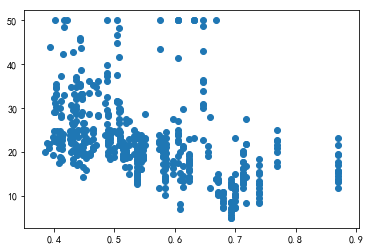

In [35]:
plt.scatter(x_nox, y)

In [36]:
def price(x, k, b):
    return k * x + b

In [37]:
def loss(y1, y2):
    return sum((y1_ - y2_) ** 2 for y1_, y2_ in zip(list(y1), list(y2))) / len(list(y))

In [38]:
def partial_derivative_k(x, y1, y2):
    y_sum = sum((y1_ - y2_) * x_ for x_, y1_, y2_ in zip(list(x), list(y1), list(y2)))
    return -2 / len(y1) * y_sum

def partial_derivative_b(y1, y2):
    y_sum = sum((y1_ - y2_) for y1_, y2_ in zip(list(y1), list(y2)))
    return -2 / len(y1) * y_sum

In [39]:
k = random.random() * 200 - 100
b = random.random() * 200 - 100

learning_rate = 1e-3

count = 6000
losses = []
for i in range(count):
    price_current = [price(x_, k, b) for x_ in x_nox]
    curr_loss = loss(y, price_current)
    losses.append(curr_loss)
    
    k_par = partial_derivative_k(x_nox, y, price_current)
    b_par = partial_derivative_b(y, price_current)
    
    k = k + (-1 * k_par) * learning_rate
    b = b + (-1 * b_par) * learning_rate
    
    print("The i is {}, the loss is {}, k is {} and b is {}".format(i, curr_loss, k, b))

The i is 0, the loss is 9267.719632379049, k is 58.972295144491675 and b is 84.87434624585657
The i is 1, the loss is 9219.739416909531, k is 58.864354473181386 and b is 84.68423988450996
The i is 2, the loss is 9172.01044616049, k is 58.75669402083529 and b is 84.4946334842002
The i is 3, the loss is 9124.531404467894, k is 58.64931305285182 and b is 84.30552573413304
The i is 4, the loss is 9077.300983057354, k is 58.542210836555334 and b is 84.11691532695083
The i is 5, the loss is 9030.317880007919, k is 58.43538664119108 and b is 83.92880095872341
The i is 6, the loss is 8983.580800216321, k is 58.32883973792013 and b is 83.74118132893922
The i is 7, the loss is 8937.088455361167, k is 58.222569399814375 and b is 83.55405514049625
The i is 8, the loss is 8890.839563867485, k is 58.11657490185152 and b is 83.36742109969315
The i is 9, the loss is 8844.832850871382, k is 58.010855520910084 and b is 83.18127791622032
The i is 10, the loss is 8799.067048184897, k is 57.9054105357644 a

The i is 379, the loss is 1357.5251318501882, k is 32.877583157337405 and b is 39.255358441763796
The i is 380, the loss is 1350.964405572912, k is 32.83700912282592 and b is 39.18543927165104
The i is 381, the loss is 1344.438027460792, k is 32.796538711598316 and b is 39.115704952311475
The i is 382, the loss is 1337.9458176470594, k is 32.75617165203866 and b is 39.0461549990849
The i is 383, the loss is 1331.4875972068273, k is 32.7159076732431 and b is 38.97678892858176
The i is 384, the loss is 1325.0631881521629, k is 32.67574650501803 and b is 38.90760625867984
The i is 385, the loss is 1318.6724134271892, k is 32.63568787787821 and b is 38.838606508520904
The i is 386, the loss is 1312.3150969031904, k is 32.595731523044925 and b is 38.7697891985074
The i is 387, the loss is 1305.9910633737668, k is 32.55587717244412 and b is 38.70115385029914
The i is 388, the loss is 1299.7001385500025, k is 32.516124558704554 and b is 38.632699986810046
The i is 389, the loss is 1293.442149

The i is 685, the loss is 355.72256413346855, k is 24.232566338586498 and b is 24.58591492432888
The i is 686, the loss is 354.4055401853938, k is 24.21381805702479 and b is 24.55492533748465
The i is 687, the loss is 353.0954054046226, k is 24.19511619469 and b is 24.524018528972416
The i is 688, the loss is 351.7921237157541, k is 24.17646062993939 and b is 24.49319428173848
The i is 689, the loss is 350.49565923229727, k is 24.157851241449112 and b is 24.4624523792982
The i is 690, the loss is 349.20597625568536, k is 24.13928790821341 and b is 24.431792605734504
The i is 691, the loss is 347.9230392742904, k is 24.12077050954377 and b is 24.401214745696397
The i is 692, the loss is 346.64681296244294, k is 24.102298925068087 and b is 24.370718584397473
The i is 693, the loss is 345.3772621794602, k is 24.083873034729837 and b is 24.340303907614437
The i is 694, the loss is 344.1143519686766, k is 24.06549271878725 and b is 24.309970501685637
The i is 695, the loss is 342.8580475564

The i is 880, the loss is 194.45959519718943, k is 21.323554879710056 and b is 19.87474004312007
The i is 881, the loss is 193.98557390644598, k is 21.311901224650384 and b is 19.856400034605564
The i is 882, the loss is 193.51402738785058, k is 21.30027539950571 and b is 19.838109634557856
The i is 883, the loss is 193.04494268235447, k is 21.288677331369207 and b is 19.81986871288578
The i is 884, the loss is 192.57830689877036, k is 21.277106947525184 and b is 19.80167713983923
The i is 885, the loss is 192.11410721341616, k is 21.26556417544859 and b is 19.783534786008282
The i is 886, the loss is 191.6523308697629, k is 21.254048942804516 and b is 19.765441522322277
The i is 887, the loss is 191.19296517808064, k is 21.242561177447694 and b is 19.747397220048953
The i is 888, the loss is 190.73599751509232, k is 21.231100807422003 and b is 19.729401750793546
The i is 889, the loss is 190.28141532362238, k is 21.21966776095996 and b is 19.711454986497913
The i is 890, the loss is 1

The i is 1082, the loss is 135.17232009512142, k is 19.447460317477226 and b is 17.021865752672298
The i is 1083, the loss is 135.0072567662952, k is 19.440176394769704 and b is 17.011312813507544
The i is 1084, the loss is 134.84305038653537, k is 19.432908856944703 and b is 17.000789060933
The i is 1085, the loss is 134.67969646865885, k is 19.425657661100942 and b is 16.99029441839825
The i is 1086, the loss is 134.51719054897967, k is 19.41842276444961 and b is 16.979828809553588
The i is 1087, the loss is 134.3555281871869, k is 19.411204124314075 and b is 16.96939215824947
The i is 1088, the loss is 134.1947049662211, k is 19.404001698129598 and b is 16.958984388535995
The i is 1089, the loss is 134.03471649215336, k is 19.39681544344302 and b is 16.948605424662386
The i is 1090, the loss is 133.8755583940638, k is 19.389645317912496 and b is 16.938255191076465
The i is 1091, the loss is 133.7172263239219, k is 19.382491279307178 and b is 16.927933612424127
The i is 1092, the los

The i is 1228, the loss is 118.23442509218395, k is 18.53754405740024 and b is 15.754572816810487
The i is 1229, the loss is 118.15697850900594, k is 18.532250382805376 and b is 15.74756391562512
The i is 1230, the loss is 118.07993010652356, k is 18.526967883283913 and b is 15.74057490499241
The i is 1231, the loss is 118.00327779993115, k is 18.521696529593108 and b is 15.733605732733738
The i is 1232, the loss is 117.92701951534076, k is 18.516436292566887 and b is 15.726656346807278
The i is 1233, the loss is 117.85115318972414, k is 18.51118714311564 and b is 15.71972669530765
The i is 1234, the loss is 117.77567677085642, k is 18.505949052226025 and b is 15.712816726465553
The i is 1235, the loss is 117.7005882172591, k is 18.500721990960752 and b is 15.705926388647413
The i is 1236, the loss is 117.62588549814421, k is 18.495505930458407 and b is 15.699055630355026
The i is 1237, the loss is 117.55156659335863, k is 18.49030084193324 and b is 15.692204400225203
The i is 1238, th

The i is 1450, the loss is 107.92829816617977, k is 17.590641548030813 and b is 14.60473415185122
The i is 1451, the loss is 107.90319063639689, k is 17.587231570601087 and b is 14.601075412282922
The i is 1452, the loss is 107.87820727605731, k is 17.583827841944558 and b is 14.597427773189025
The i is 1453, the loss is 107.85334743523596, k is 17.58043034573366 and b is 14.593791205436254
The i is 1454, the loss is 107.82861046741124, k is 17.577039065683632 and b is 14.590165679967713
The i is 1455, the loss is 107.8039957294471, k is 17.573653985552408 and b is 14.586551167802686
The i is 1456, the loss is 107.77950258157534, k is 17.570275089140505 and b is 14.582947640036437
The i is 1457, the loss is 107.75513038737795, k is 17.566902360290904 and b is 14.579355067840012
The i is 1458, the loss is 107.7308785137695, k is 17.56353578288895 and b is 14.575773422460038
The i is 1459, the loss is 107.70674633097971, k is 17.560175340862227 and b is 14.572202675218527
The i is 1460, 

The i is 1657, the loss is 104.63889706043683, k is 16.997087928438702 and b is 14.04672377636953
The i is 1658, the loss is 104.6295083011955, k is 16.99467816774781 and b is 14.044839540072617
The i is 1659, the loss is 104.62016146032211, k is 16.99227204489912 and b is 14.042961745612997
The i is 1660, the loss is 104.61085631860337, k is 16.98986955040999 and b is 14.041090376071208
The i is 1661, the loss is 104.6015926579749, k is 16.98747067482263 and b is 14.03922541457215
The i is 1662, the loss is 104.59237026151357, k is 16.98507540870406 and b is 14.03736684428496
The i is 1663, the loss is 104.58318891343251, k is 16.982683742646014 and b is 14.03551464842291
The i is 1664, the loss is 104.57404839907446, k is 16.980295667264897 and b is 14.033668810243274
The i is 1665, the loss is 104.56494850490648, k is 16.97791117320172 and b is 14.031829313047227
The i is 1666, the loss is 104.55588901851404, k is 16.975530251122017 and b is 14.029996140179724
The i is 1667, the los

The i is 1870, the loss is 103.31545509549349, k is 16.552750358821942 and b is 13.767284431821732
The i is 1871, the loss is 103.31145978366713, k is 16.550935948041968 and b is 13.76645201792296
The i is 1872, the loss is 103.30747820980815, k is 16.549123625903743 and b is 13.765623281741375
The i is 1873, the loss is 103.30351030227072, k is 16.547313386985973 and b is 13.764798213604426
The i is 1874, the loss is 103.29955598978366, k is 16.54550522588157 and b is 13.763976803864917
The i is 1875, the loss is 103.29561520144887, k is 16.543699137197624 and b is 13.76315904290095
The i is 1876, the loss is 103.29168786673988, k is 16.54189511555536 and b is 13.76234492111585
The i is 1877, the loss is 103.28777391549926, k is 16.540093155590107 and b is 13.761534428938106
The i is 1878, the loss is 103.28387327793725, k is 16.538293251951256 and b is 13.760727556821294
The i is 1879, the loss is 103.27998588462907, k is 16.536495399302225 and b is 13.759924295244028
The i is 1880, 

The i is 2226, the loss is 102.40482621068679, k is 16.006237413944323 and b is 13.64524158244856
The i is 2227, the loss is 102.40306051718838, k is 16.004909353472872 and b is 13.645259550309255
The i is 2228, the loss is 102.40129698989546, k is 16.003582125915838 and b is 13.645278955571394
The i is 2229, the loss is 102.39953561775374, k is 16.002255729143705 and b is 13.645299794436145
The i is 2230, the loss is 102.3977763897671, k is 16.000930161032542 and b is 13.645322063114639
The i is 2231, the loss is 102.39601929499705, k is 15.999605419463979 and b is 13.64534575782794
The i is 2232, the loss is 102.39426432256215, k is 15.9982815023252 and b is 13.64537087480702
The i is 2233, the loss is 102.39251146163839, k is 15.996958407508933 and b is 13.645397410292732
The i is 2234, the loss is 102.39076070145764, k is 15.995636132913424 and b is 13.64542536053579
The i is 2235, the loss is 102.38901203130929, k is 15.994314676442428 and b is 13.64545472179673
The i is 2236, the

The i is 2719, the loss is 101.66856361690084, k is 15.4209667244844 and b is 13.772146133185592
The i is 2720, the loss is 101.66719786363602, k is 15.41987372380647 and b is 13.772559585464393
The i is 2721, the loss is 101.66583232356012, k is 15.418780966346832 and b is 13.772973423402789
The i is 2722, the loss is 101.66446699584051, k is 15.41768845152145 and b is 13.773387645959636
The i is 2723, the loss is 101.66310187964925, k is 15.416596178747817 and b is 13.77380225209652
The i is 2724, the loss is 101.6617369741618, k is 15.415504147444954 and b is 13.774217240777752
The i is 2725, the loss is 101.66037227855878, k is 15.414412357033406 and b is 13.774632610970357
The i is 2726, the loss is 101.65900779202477, k is 15.413320806935232 and b is 13.775048361644073
The i is 2727, the loss is 101.65764351374865, k is 15.412229496574007 and b is 13.775464491771334
The i is 2728, the loss is 101.65627944292349, k is 15.411138425374814 and b is 13.775881000327272
The i is 2729, t

The i is 3204, the loss is 101.0218982909938, k is 14.911132783155255 and b is 14.00318812873311
The i is 3205, the loss is 101.02058667307664, k is 14.910110869593533 and b is 14.003705101757442
The i is 3206, the loss is 101.01927512112366, k is 14.909089038754813 and b is 14.004222174536533
The i is 3207, the loss is 101.01796363506769, k is 14.908067290475303 and b is 14.0047393467791
The i is 3208, the loss is 101.01665221484174, k is 14.907045624591644 and b is 14.005256618194629
The i is 3209, the loss is 101.01534086037911, k is 14.906024040940903 and b is 14.005773988493361
The i is 3210, the loss is 101.01402957161363, k is 14.905002539360568 and b is 14.006291457386304
The i is 3211, the loss is 101.01271834847957, k is 14.90398111968856 and b is 14.00680902458522
The i is 3212, the loss is 101.01140719091083, k is 14.902959781763217 and b is 14.007326689802628
The i is 3213, the loss is 101.01009609884292, k is 14.901938525423304 and b is 14.007844452751804
The i is 3214, t

The i is 3725, the loss is 100.34655910640613, k is 14.387097004289467 and b is 14.281026842912821
The i is 3726, the loss is 100.34527730621332, k is 14.386103382097641 and b is 14.281569498623648
The i is 3727, the loss is 100.34399555923572, k is 14.385109795968676 and b is 14.282112171337696
The i is 3728, the loss is 100.34271386546683, k is 14.384116245860548 and b is 14.282654860980948
The i is 3729, the loss is 100.34143222490046, k is 14.383122731731348 and b is 14.283197567479586
The i is 3730, the loss is 100.34015063753009, k is 14.382129253539269 and b is 14.283740290759985
The i is 3731, the loss is 100.33886910334948, k is 14.381135811242615 and b is 14.284283030748712
The i is 3732, the loss is 100.33758762235246, k is 14.3801424047998 and b is 14.28482578737253
The i is 3733, the loss is 100.33630619453275, k is 14.379149034169346 and b is 14.285368560558389
The i is 3734, the loss is 100.33502481988394, k is 14.37815569930988 and b is 14.28591135023344
The i is 3735, 

The i is 4212, the loss is 99.72853160059293, k is 13.90686673103363 and b is 14.546253106299929
The i is 4213, the loss is 99.72727521365198, k is 13.905887261521219 and b is 14.546798072203773
The i is 4214, the loss is 99.7260188781491, k is 13.90490781642026 and b is 14.547343034789607
The i is 4215, the loss is 99.72476259408195, k is 13.90392839571876 and b is 14.547887994036987
The i is 4216, the loss is 99.72350636144829, k is 13.90294899940475 and b is 14.548432949925521
The i is 4217, the loss is 99.72225018024508, k is 13.901969627466297 and b is 14.54897790243487
The i is 4218, the loss is 99.72099405047085, k is 13.900990279891497 and b is 14.549522851544753
The i is 4219, the loss is 99.71973797212236, k is 13.900010956668474 and b is 14.550067797234936
The i is 4220, the loss is 99.71848194519761, k is 13.899031657785386 and b is 14.550612739485247
The i is 4221, the loss is 99.717225969694, k is 13.898052383230416 and b is 14.551157678275562
The i is 4222, the loss is 9

The i is 4412, the loss is 99.47827473974922, k is 13.711444641183181 and b is 14.655156579311448
The i is 4413, the loss is 99.47702859400538, k is 13.710469850495656 and b is 14.655700537604702
The i is 4414, the loss is 99.47578249924051, k is 13.70949508233279 and b is 14.656244489404525
The i is 4415, the loss is 99.4745364554526, k is 13.708520336687322 and b is 14.656788434698916
The i is 4416, the loss is 99.47329046263937, k is 13.707545613552009 and b is 14.657332373475905
The i is 4417, the loss is 99.4720445207985, k is 13.706570912919625 and b is 14.657876305723555
The i is 4418, the loss is 99.4707986299281, k is 13.705596234782966 and b is 14.65842023142996
The i is 4419, the loss is 99.46955279002567, k is 13.70462157913484 and b is 14.658964150583245
The i is 4420, the loss is 99.46830700108916, k is 13.703646945968075 and b is 14.65950806317157
The i is 4421, the loss is 99.46706126311625, k is 13.702672335275517 and b is 14.660051969183122
The i is 4422, the loss is 

The i is 4647, the loss is 99.18682753498011, k is 13.482974621555487 and b is 14.782786146387
The i is 4648, the loss is 99.18559331002645, k is 13.482004957717164 and b is 14.783328307928269
The i is 4649, the loss is 99.18435913554912, k is 13.481035315104464 and b is 14.783870460881936
The i is 4650, the loss is 99.18312501154583, k is 13.480065693713282 and b is 14.784412605241627
The i is 4651, the loss is 99.18189093801469, k is 13.479096093539525 and b is 14.78495474100099
The i is 4652, the loss is 99.18065691495322, k is 13.478126514579106 and b is 14.785496868153686
The i is 4653, the loss is 99.17942294235985, k is 13.477156956827953 and b is 14.786038986693395
The i is 4654, the loss is 99.17818902023211, k is 13.476187420282 and b is 14.786581096613812
The i is 4655, the loss is 99.17695514856797, k is 13.475217904937194 and b is 14.787123197908652
The i is 4656, the loss is 99.17572132736547, k is 13.474248410789487 and b is 14.787665290571645
The i is 4657, the loss is 

The i is 5043, the loss is 98.70200086504924, k is 13.100613728821186 and b is 14.996759427708747
The i is 5044, the loss is 98.70078646667332, k is 13.099652227904041 and b is 14.997297830083502
The i is 5045, the loss is 98.69957211795715, k is 13.098690747140873 and b is 14.997836222333124
The i is 5046, the loss is 98.69835781889907, k is 13.097729286529972 and b is 14.998374604455504
The i is 5047, the loss is 98.69714356949679, k is 13.096767846069632 and b is 14.99891297644854
The i is 5048, the loss is 98.69592936974827, k is 13.095806425758148 and b is 14.999451338310138
The i is 5049, the loss is 98.69471521965157, k is 13.094845025593823 and b is 14.999989690038204
The i is 5050, the loss is 98.69350111920471, k is 13.09388364557496 and b is 15.000528031630656
The i is 5051, the loss is 98.69228706840565, k is 13.092922285699869 and b is 15.001066363085418
The i is 5052, the loss is 98.69107306725212, k is 13.091960945966857 and b is 15.001604684400416
The i is 5053, the los

The i is 5222, the loss is 98.48541277987808, k is 12.928824660743254 and b is 15.092970398861143
The i is 5223, the loss is 98.48420723830927, k is 12.927866743041564 and b is 15.093506960388197
The i is 5224, the loss is 98.48300174603794, k is 12.926908845235015 and b is 15.094043511496631
The i is 5225, the loss is 98.48179630306176, k is 12.925950967322391 and b is 15.094580052185208
The i is 5226, the loss is 98.48059090937879, k is 12.924993109302475 and b is 15.0951165824527
The i is 5227, the loss is 98.47938556498706, k is 12.924035271174054 and b is 15.095653102297879
The i is 5228, the loss is 98.47818026988455, k is 12.923077452935916 and b is 15.096189611719522
The i is 5229, the loss is 98.47697502406933, k is 12.922119654586853 and b is 15.09672611071641
The i is 5230, the loss is 98.47576982753928, k is 12.921161876125655 and b is 15.09726259928733
The i is 5231, the loss is 98.47456468029235, k is 12.92020411755112 and b is 15.097799077431068
The i is 5232, the loss i

The i is 5722, the loss is 97.88875027864029, k is 12.4523268710122 and b is 15.359933614609844
The i is 5723, the loss is 97.88756913583663, k is 12.451378782122982 and b is 15.360464871644853
The i is 5724, the loss is 97.88638804133187, k is 12.450430712701834 and b is 15.360996117966236
The i is 5725, the loss is 97.88520699512479, k is 12.44948266274814 and b is 15.361527353573825
The i is 5726, the loss is 97.88402599721292, k is 12.448534632261287 and b is 15.36205857846745
The i is 5727, the loss is 97.88284504759443, k is 12.447586621240657 and b is 15.36258979264694
The i is 5728, the loss is 97.88166414626734, k is 12.446638629685635 and b is 15.36312099611213
The i is 5729, the loss is 97.88048329322952, k is 12.44569065759561 and b is 15.363652188862854
The i is 5730, the loss is 97.87930248847924, k is 12.444742704969968 and b is 15.364183370898946
The i is 5731, the loss is 97.87812173201445, k is 12.443794771808093 and b is 15.364714542220241
The i is 5732, the loss is 

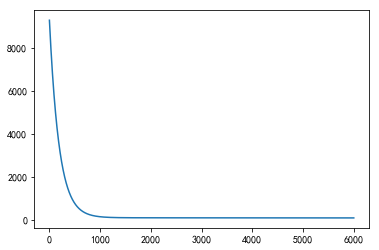

In [40]:
plt.plot(list(range(count)),losses)

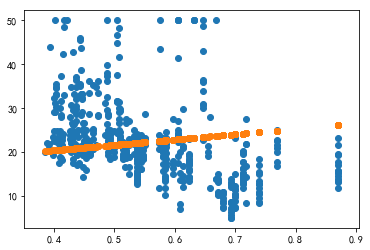

In [41]:
price_use_best_parameters = [price(r, k, b) for r in x_nox]

plt.scatter(x_nox, y)
plt.scatter(x_nox, price_use_best_parameters)